In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat 

In [2]:
data = loadmat("Regularized_Linear_Regression.mat")
X,y,Xval,yval,Xtest,ytest = data['X'],data['y'],data["Xtest"],data["ytest"],data['Xval'],data['yval']

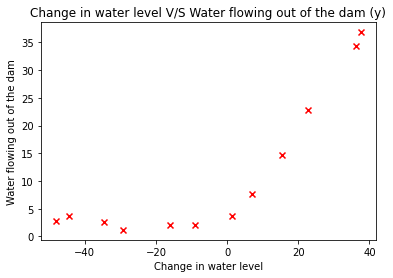

In [3]:
plt.scatter(X,y,c="r",marker="x")
plt.title("Change in water level V/S Water flowing out of the dam (y)")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
plt.show()

In [4]:
def linearRegressionCostFunction(X, y, weights, reg_factor):
    m = len(y)
    weights = weights.reshape(-1,y.shape[1])
    unreg_term = (1/(2 * m)) * np.sum(np.square(np.dot(X,weights) - y))
    reg_term = (reg_factor/(2 * m)) * np.sum(np.square(weights[1:len(weights)]))
    
    J = unreg_term + reg_term
    
    grad = np.zeros(weights.shape)
    
    grad = (1/m) * np.dot(X.T, np.dot(X,weights) - y) + (reg_factor/m) * weights
    unreg = (1/m) * np.dot(X.T, np.dot(X,weights) - y)
    grad[0] = unreg[0]
    
    return (J,grad.flatten())

In [5]:
X_aug = np.append(np.ones((X.shape[0],1)),X,axis = 1)
weights = np.array([[1], [1]])

In [6]:
J,grad = linearRegressionCostFunction(X_aug, y, weights, 1)
print('Cost and Gradient at Weights = [1, 1]:', (J, grad))

Cost and Gradient at Weights = [1, 1]: (303.9931922202643, array([-15.30301567, 598.25074417]))


In [7]:
from scipy.optimize import minimize

def trainLinearRegression(X, y, reg_factor):
    initial_weights = np.zeros((X.shape[1],1))
    
    def costFunction(weights):
        return linearRegressionCostFunction(X, y, weights, reg_factor)
    
    res = minimize(fun=costFunction, x0= initial_weights, jac=True,method='CG',options={'maxiter':200})
    
    weights = res.x
    
    return weights

In [8]:
weights = trainLinearRegression(X_aug, y, 0)
weights

array([13.08790351,  0.36777923])

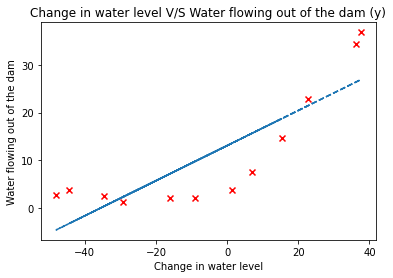

In [9]:
plt.scatter(X,y,c="r",marker="x")
plt.plot(X,np.dot(X_aug,weights),'--')
plt.title("Change in water level V/S Water flowing out of the dam (y)")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
plt.show()

## Bias v/s Variance

In [10]:
def learningCurve(X,y,Xval,yval,reg_factor):
    m = len(y)
    
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    
    for i in range(1,m+1):
        weights = trainLinearRegression(X[:i,], y[:i,], reg_factor)
        
        error_train[i-1] = linearRegressionCostFunction(X[:i,], y[:i,], weights, 0)[0]
        error_val[i-1] = linearRegressionCostFunction(Xval, yval, weights, 0)[0]
    
    return error_train,error_val

In [11]:
Xval_aug = np.append(np.ones((Xval.shape[0],1)),Xval,axis = 1)

In [14]:
error_train, error_val = learningCurve(X_aug,y,Xval_aug,yval,0)
m = len(y)


In [15]:
print("#Training Examples\tTrain Error\tCross Validation Error")

for i in range(1,m+1):
    print("{}\t\t\t{:f}\t{:f}".format(i+1,float(error_train[i-1]),float(error_val[i-1])))

#Training Examples	Train Error	Cross Validation Error
2			0.000000	238.968432
3			0.000000	132.026094
4			3.286595	41.308759
5			2.842678	43.666250
6			13.154049	33.021184
7			19.443963	31.984766
8			20.098522	31.663741
9			18.172859	30.804718
10			22.609405	32.368789
11			23.261462	31.105808
12			24.317250	32.892127
13			22.373906	32.505749


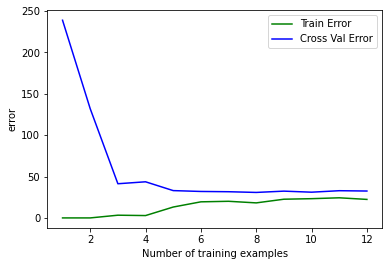

In [16]:
m = len(y)
plt.xlabel("Number of training examples")
plt.ylabel("error")
plt.plot(range(1,m+1),error_train,c="green")
plt.plot(range(1,m+1),error_val,c="blue")
plt.legend(["Train Error","Cross Val Error"])
plt.show()

Since the training &  cross validation error are close together, its a high bias problem, which is also relevant from best fit plot

In [17]:
def polyRegression(X,p):
    
    X_poly = X
    for i in range(p):
        X_poly = np.column_stack((X_poly, np.power(X, i+1)))  
    
    return X_poly

In [18]:
def feature_Normalize(X):
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X, axis = 0)
    
    X_norm = (X - X_mean)/X_std
    
    return X_norm, X_mean, X_std

In [19]:
p = 8

X_poly = polyRegression(X,p)
X_poly,mu,sigma = feature_Normalize(X_poly)
X_poly = np.append(np.ones((X_poly.shape[0],1)),X_poly,axis = 1)

In [20]:
X_poly_test = polyRegression(Xtest,p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_test = np.append(np.ones((X_poly_test.shape[0],1)),X_poly_test,axis = 1)

X_poly_val = polyRegression(Xval,p)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_val = np.append(np.ones((X_poly_val.shape[0],1)),X_poly_val,axis = 1)

In [21]:
weights_poly = trainLinearRegression(X_poly, y, 0)

In [22]:
weights_poly

array([ 11.21900638,   5.15148151,   5.15148151,  16.44813917,
        14.96994088, -22.27391705, -26.74461208,  18.72676452,
        14.93253915,  -5.45247228])

In [23]:
def plot_fn(x,mu,sigma,weights_poly,p):
    xplot = polyRegression(x,p)
    xplot = xplot - mu
    xplot = xplot/sigma
    
    xplot = np.append(np.ones((xplot.shape[0],1)),xplot, axis = 1)
    
    plt.plot(x,np.dot(xplot,weights_poly),"--")

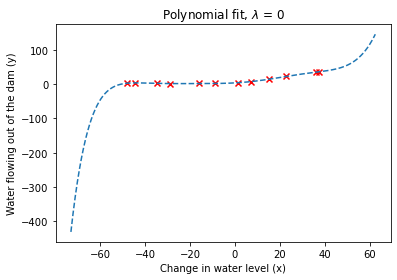

In [24]:
x = np.array(np.arange(min(X) - 25,max(X) + 25,0.05))
plt.scatter(X,y,c="r",marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial fit, $\lambda$ = 0')
#plt.plot(X, y, 'rx')
plot_fn(x,mu,sigma,weights_poly,p)

In [25]:
error_train, error_val = learningCurve(X_poly, y,X_poly_val, yval, 0)

In [26]:
print("#Training Examples\tTrain Error\tCross Validation Error")

for i in range(1,m+1):
    print("{}\t\t\t{:f}\t{:f}".format(i+1,float(error_train[i-1]),float(error_val[i-1])))

#Training Examples	Train Error	Cross Validation Error
2			0.000000	195.061528
3			0.000000	192.746077
4			0.000000	169.981158
5			0.000000	181.550438
6			0.000000	3.530847
7			0.000000	19.502091
8			0.000000	96.518504
9			0.000001	143.849829
10			0.001140	94.331199
11			0.091065	13.851811
12			0.037195	22.852605
13			0.083200	19.428424


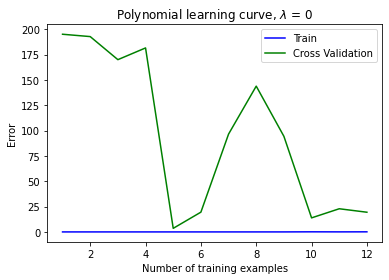

In [27]:
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial learning curve, $\lambda$ = 0')
plt.plot(range(1,m+1), error_train, 'b', label='Train')
plt.plot(range(1,m+1), error_val, 'g', label='Cross Validation')
plt.legend()
plt.legend()

The training error is very small and the cross validation error is huge(in comparison to one another). So this is a problem of high variance.

## Test for 2 values of $\lambda - (1,50)$ 

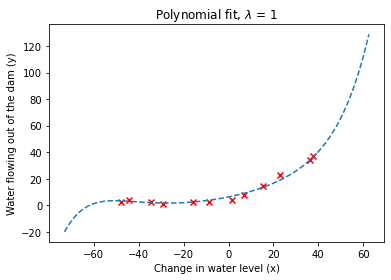

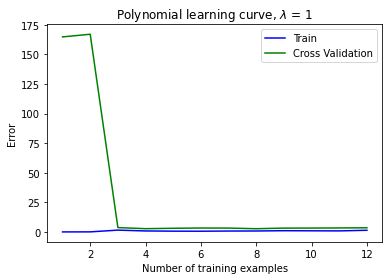

In [28]:
lambda_ = 1
theta = trainLinearRegression(X_poly, y, lambda_)

x = np.array(np.arange(min(X) - 25,max(X) + 25,0.05))
plt.scatter(X,y,c="r",marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial fit, $\lambda$ = 1')
#plt.plot(X, y, 'rx')
plot_fn(x,mu,sigma,theta,p)
plt.show()

error_train, error_val = learningCurve(X_poly, y,X_poly_val, yval, lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial learning curve, $\lambda$ = 1')
plt.plot(range(1,m+1), error_train, 'b', label='Train')
plt.plot(range(1,m+1), error_val, 'g', label='Cross Validation')
plt.legend()
plt.show()

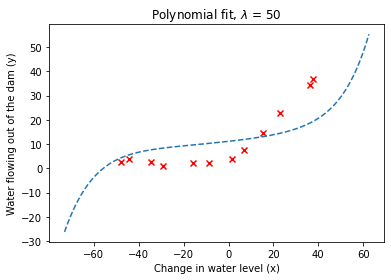

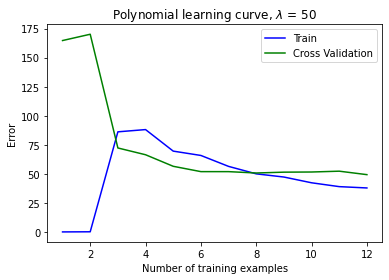

In [29]:
lambda_ = 50
theta = trainLinearRegression(X_poly, y, lambda_)

x = np.array(np.arange(min(X) - 25,max(X) + 25,0.05))
plt.scatter(X,y,c="r",marker="x")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial fit, $\lambda$ = 50')
plot_fn(x,mu,sigma,theta,p)
plt.show()

error_train, error_val = learningCurve(X_poly, y,X_poly_val, yval, lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial learning curve, $\lambda$ = 50')
plt.plot(range(1,m+1), error_train, 'b', label='Train')
plt.plot(range(1,m+1), error_val, 'g', label='Cross Validation')
plt.legend()
plt.show()

## Training Optimal $\lambda$ from Cross Validation Set

In [30]:
def Train_lambda(X_poly,y,X_poly_val,yval,lambda_):
    m = len(lambda_)
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    
    for i in range(m):
        lambda_i = lambda_[i]
        weights = trainLinearRegression(X_poly, y, lambda_i)
        
        error_train[i] = linearRegressionCostFunction(X_poly, y, weights, 0)[0]
        error_val[i] = linearRegressionCostFunction(X_poly_val, yval, weights, 0)[0]
        
    return error_train,error_val,lambda_

lambda values	Train Error	Cross Validation Error
0		0.083200	19.428424
0.001		0.108243	14.912764
0.003		0.172851	17.045001
0.01		0.219830	15.816118
0.03		0.277252	13.146577
0.1		0.412856	10.163130
0.3		0.697066	6.590623
1		1.392026	3.498811
3		3.053717	3.668159
10		10.375429	11.515818


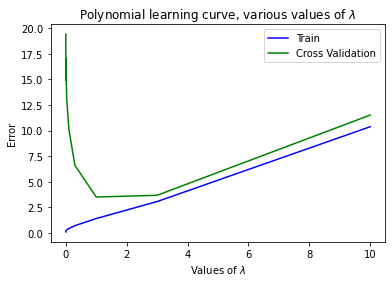

In [31]:
lambda_ = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
error_train,error_val,lambda_ = Train_lambda(X_poly,y,X_poly_val,yval,lambda_)

print("lambda values\tTrain Error\tCross Validation Error")

for i in range(len(lambda_)):
    print("{}\t\t{:f}\t{:f}".format(lambda_[i],float(error_train[i]),float(error_val[i])))

plt.xlabel('Values of $\lambda$')
plt.ylabel('Error')
plt.title('Polynomial learning curve, various values of $\lambda$')
plt.plot(lambda_, error_train, 'b', label='Train')
plt.plot(lambda_, error_val, 'g', label='Cross Validation')
plt.legend()
plt.show()

We can see that at $\lambda = 3$ the cross validation & training error are closer to one another and seems to be optimal value for $\lambda$

## Computing Test Error

In [32]:
best_weights = trainLinearRegression(X_poly,y,3)

cost = linearRegressionCostFunction(X_poly_test,ytest,best_weights,0)[0]

print("Test error for the best lambda: {0:.4f}".format(cost))

Test error for the best lambda: 3.5280
